# MNIST neural network: With Convolution layers
- Sigmoid
- 5 convolution layers

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

/home/sandeep/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [29]:
# neural network with 5 layers
#
# · · · · · · · · · ·          (input data, flattened pixels)       X [batch, 784]   # 784 = 28*28
# \x/x\x/x\x/x\x/x\x/       -- fully connected layer (sigmoid)      W1 [784, 200]      B1[200]
#  · · · · · · · · ·                                                Y1 [batch, 200]
#   \x/x\x/x\x/x\x/         -- fully connected layer (sigmoid)      W2 [200, 100]      B2[100]
#    · · · · · · ·                                                  Y2 [batch, 100]
#     \x/x\x/x\x/           -- fully connected layer (sigmoid)      W3 [100, 60]       B3[60]
#      · · · · ·                                                    Y3 [batch, 60]
#       \x/x\x/             -- fully connected layer (sigmoid)      W4 [60, 30]        B4[30]
#        · · ·                                                      Y4 [batch, 30]
#         \x/               -- fully connected layer (softmax)      W5 [30, 10]        B5[10]
#          ·                                                        Y5 [batch, 10]

In [2]:
L=200
M=100
N=60
O=30

W1=tf.Variable(tf.truncated_normal([28*28,L],stddev=0.1))
B1=tf.Variable(tf.zeros([L]))

W2=tf.Variable(tf.truncated_normal([L,M],stddev=0.1))
B2=tf.Variable(tf.zeros([M]))

W3=tf.Variable(tf.truncated_normal([M,N],stddev=0.1))
B3=tf.Variable(tf.zeros([N]))

W4=tf.Variable(tf.truncated_normal([N,O],stddev=0.1))
B4=tf.Variable(tf.zeros([O]))

W5=tf.Variable(tf.truncated_normal([O,10],stddev=0.1))
B5=tf.Variable(tf.zeros([10]))


X=tf.placeholder(tf.float32,[None, 28,28,1])
xx = tf.reshape(X,[-1,28*28])

Y1=tf.nn.softmax(tf.matmul(xx,W1)+B1)
Y2=tf.nn.softmax(tf.matmul(Y1,W2)+B2)
Y3=tf.nn.softmax(tf.matmul(Y2,W3)+B3)
Y4=tf.nn.softmax(tf.matmul(Y3,W4)+B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)


In [3]:
Y_ = tf.placeholder(tf.float32,[None,10])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [5]:
is_correct=tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [6]:
# training step, learning rate = 0.003
learning_rate = 0.003
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

In [7]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

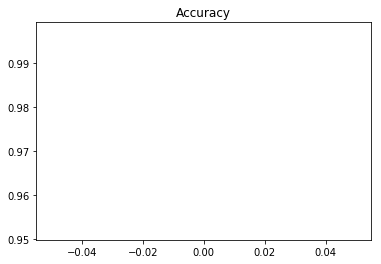

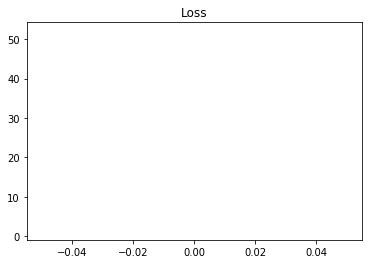

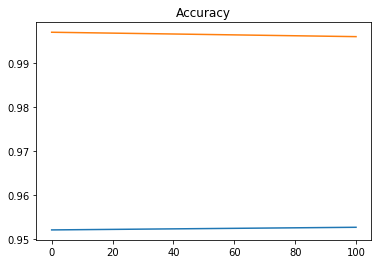

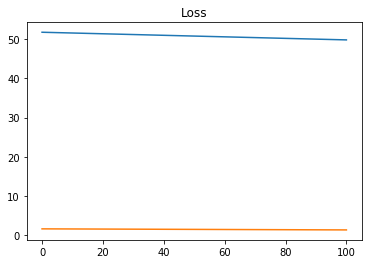

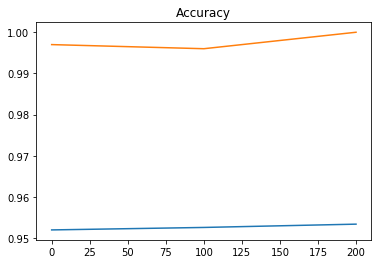

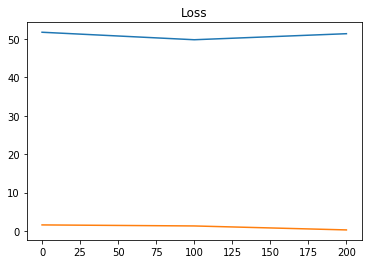

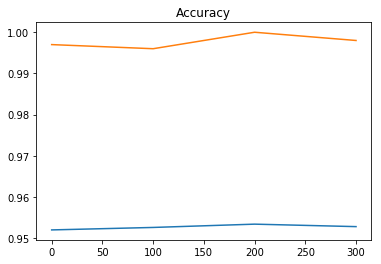

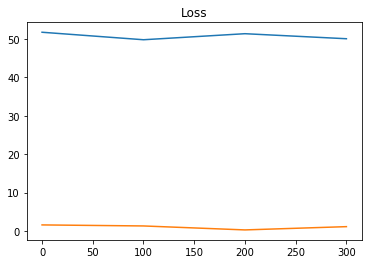

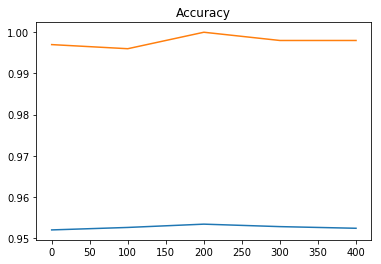

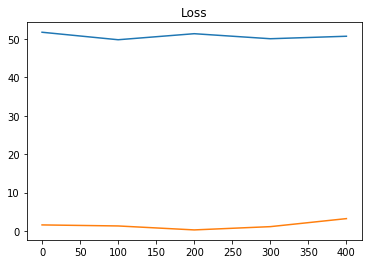

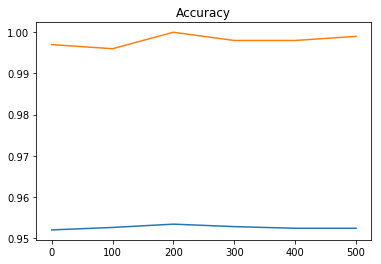

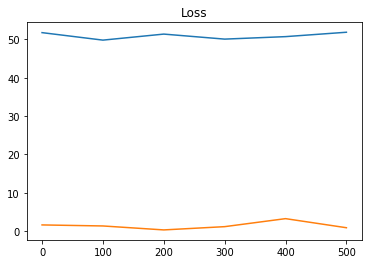

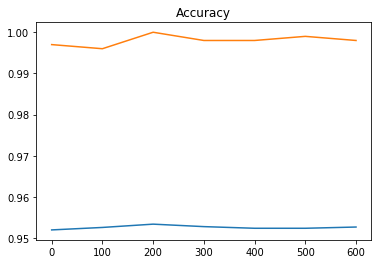

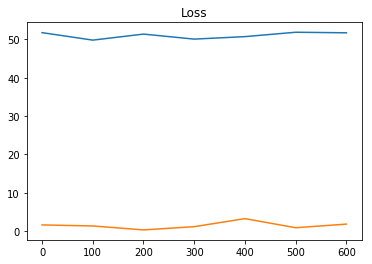

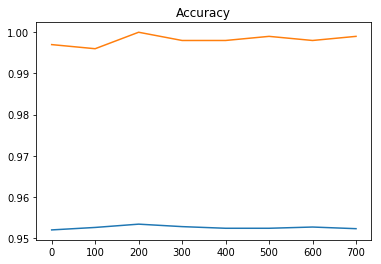

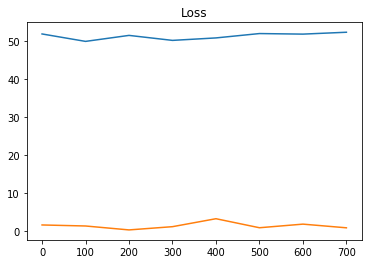

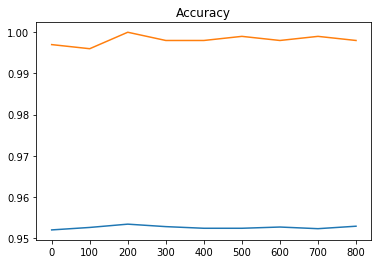

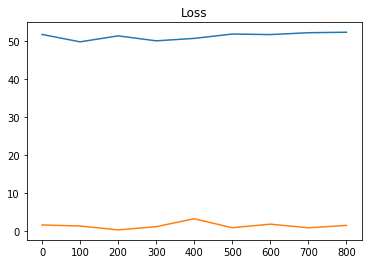

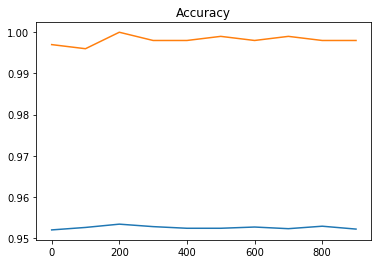

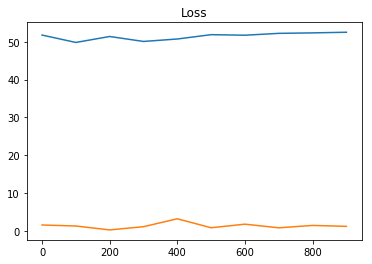

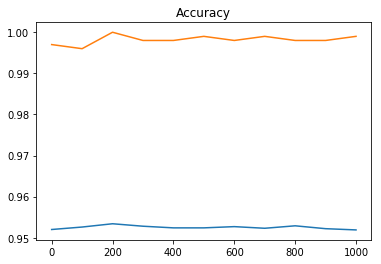

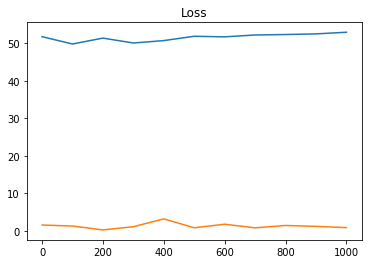

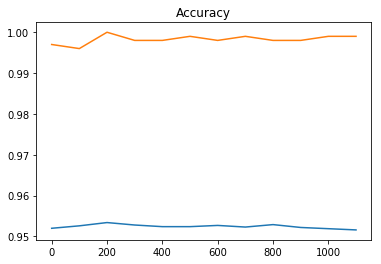

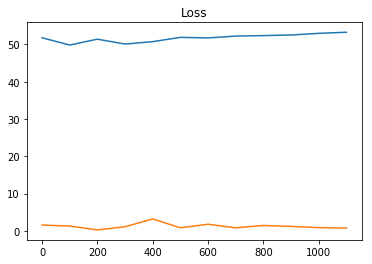

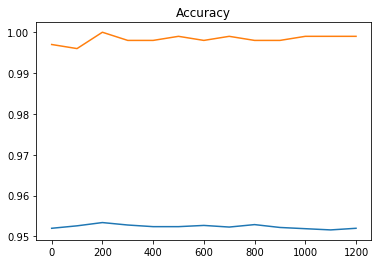

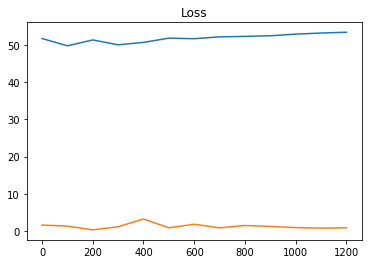

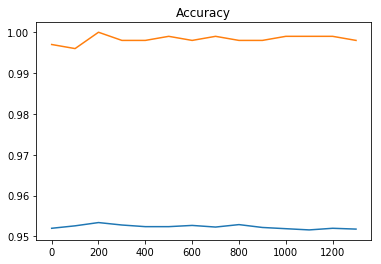

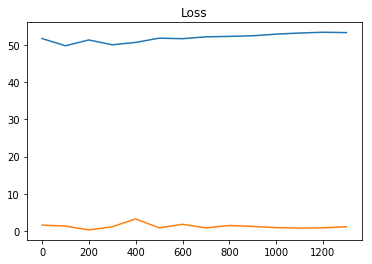

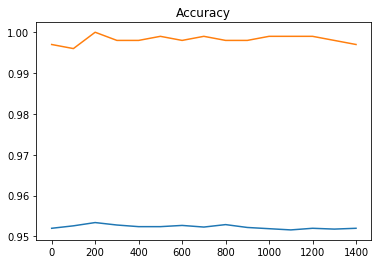

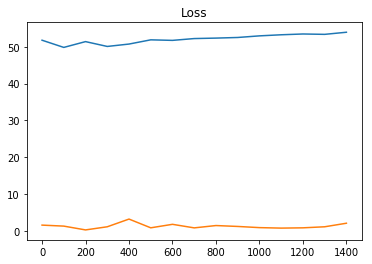

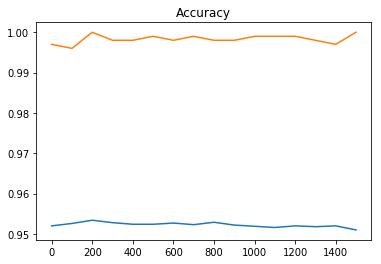

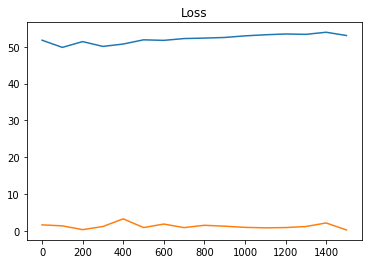

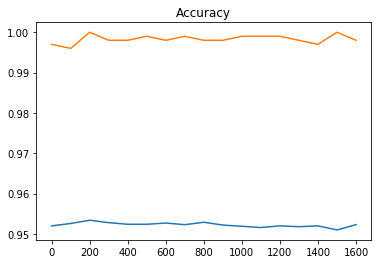

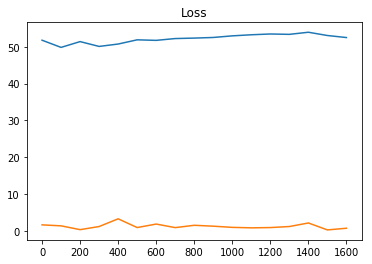

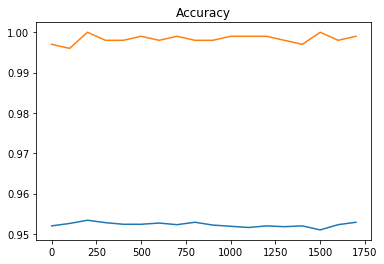

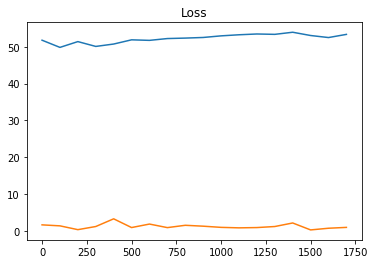

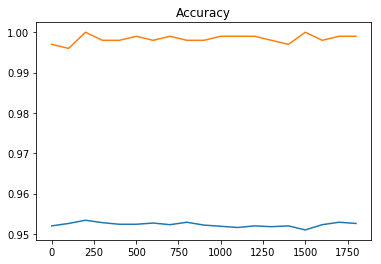

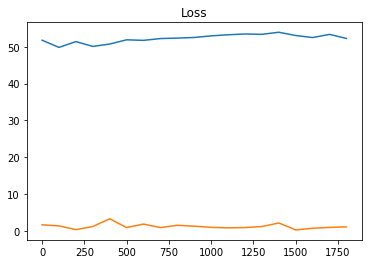

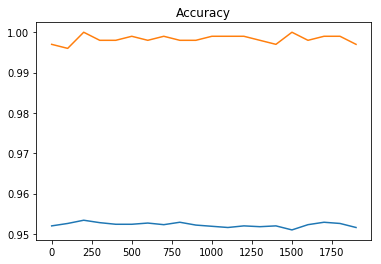

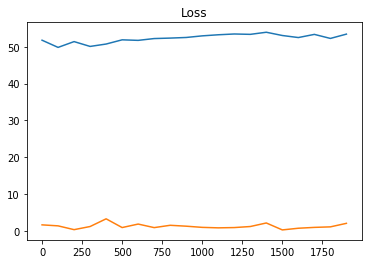

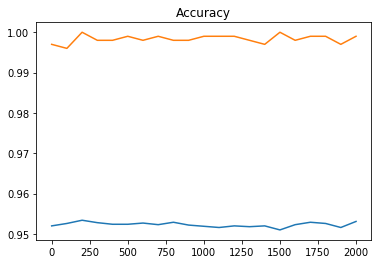

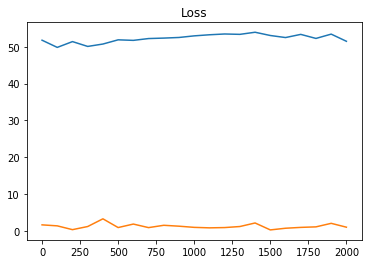

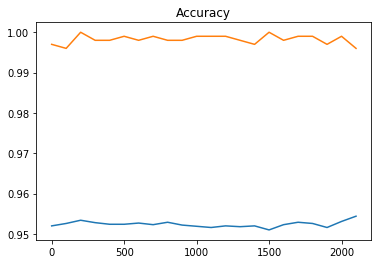

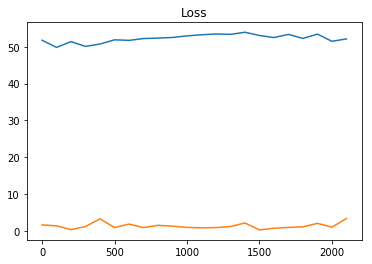

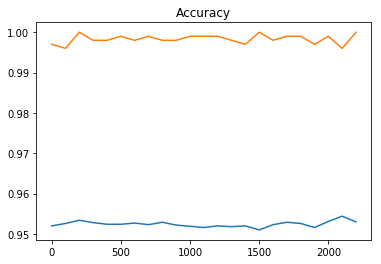

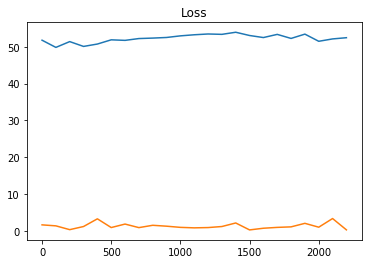

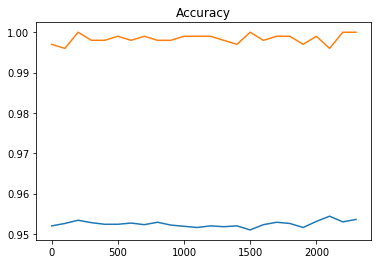

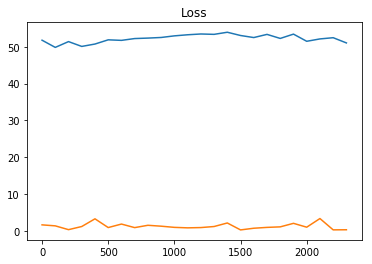

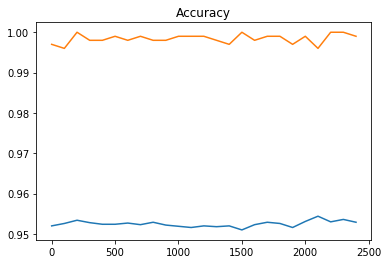

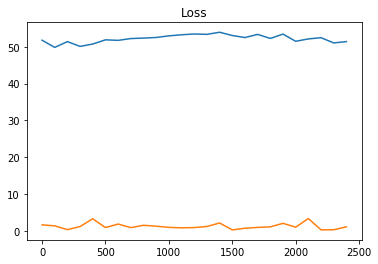

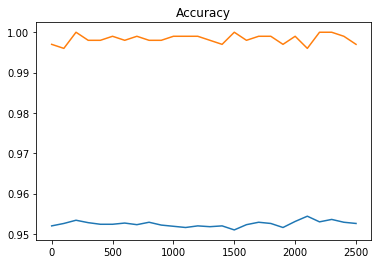

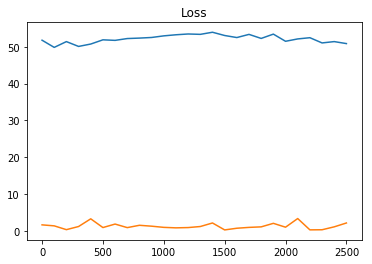

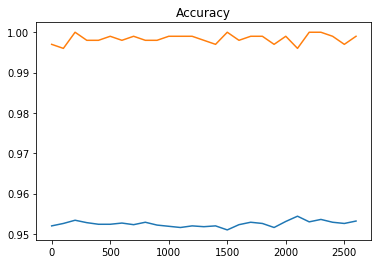

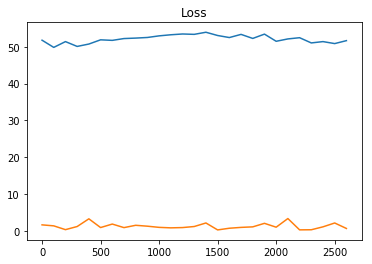

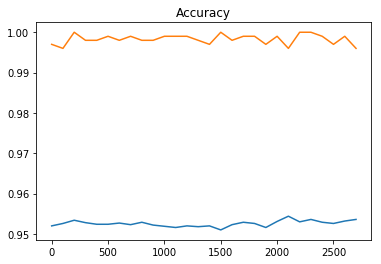

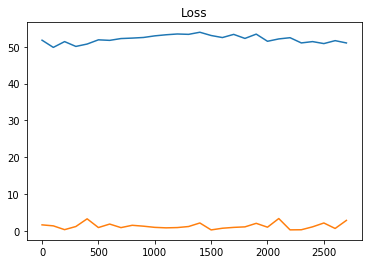

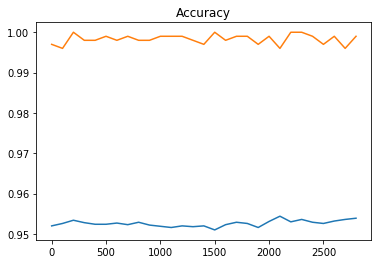

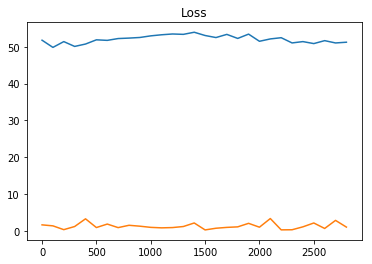

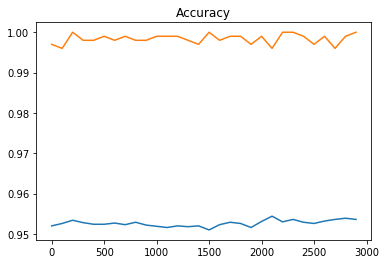

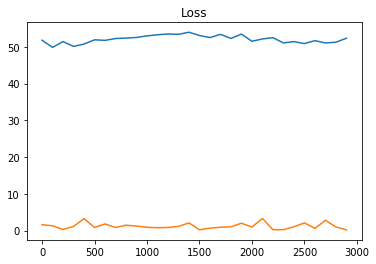

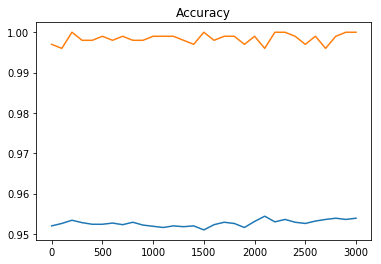

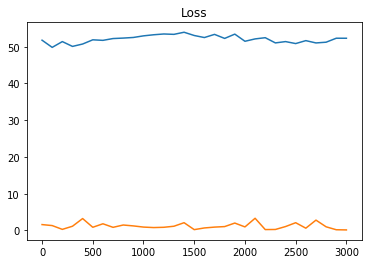

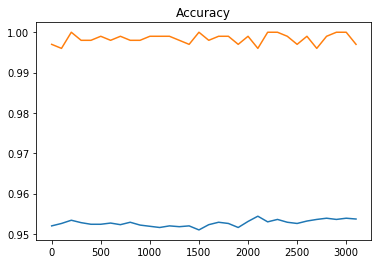

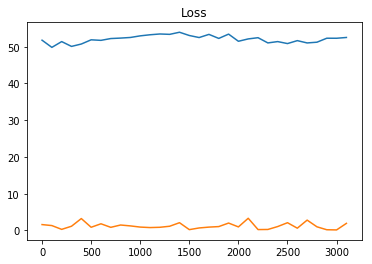

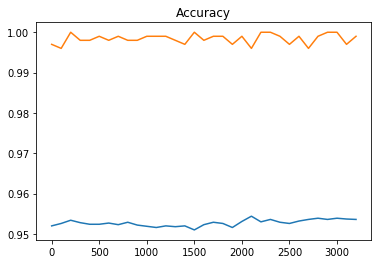

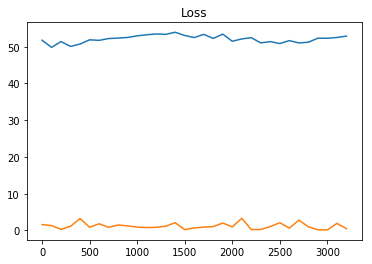

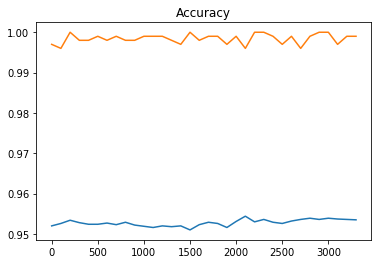

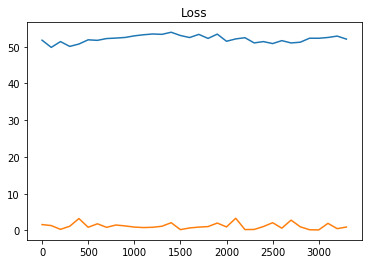

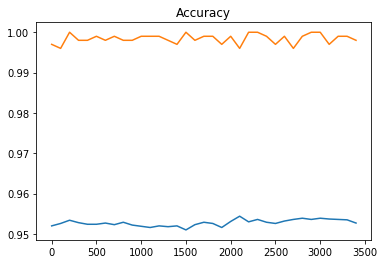

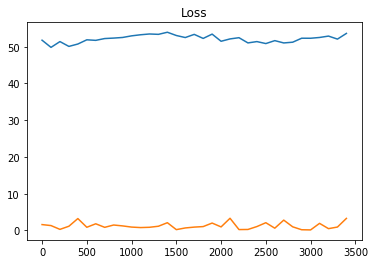

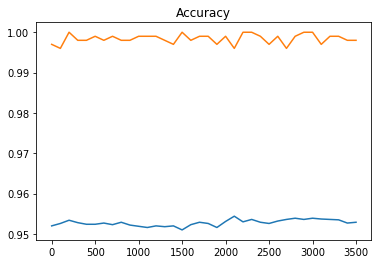

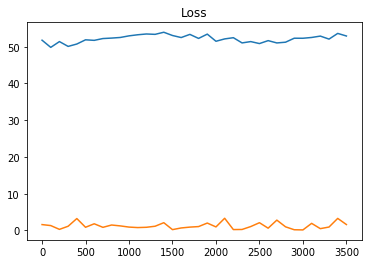

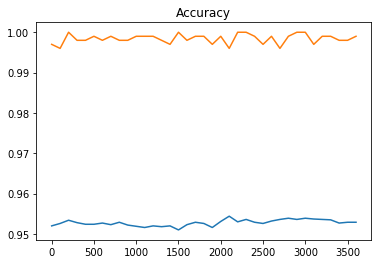

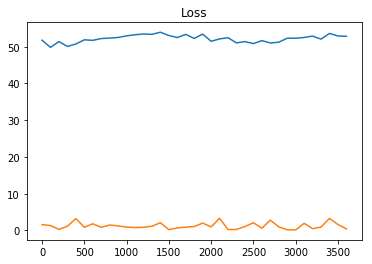

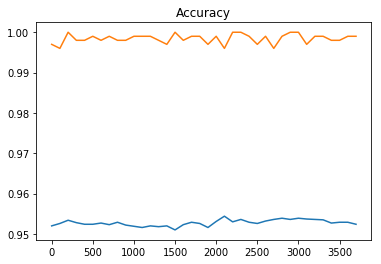

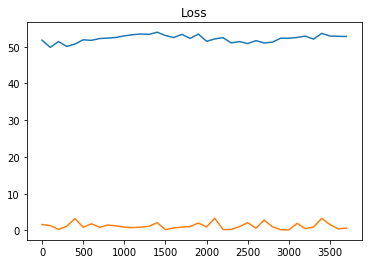

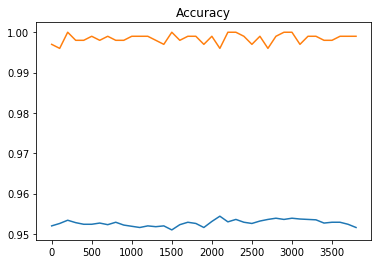

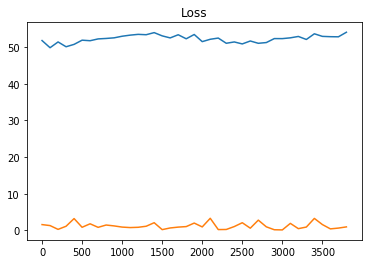

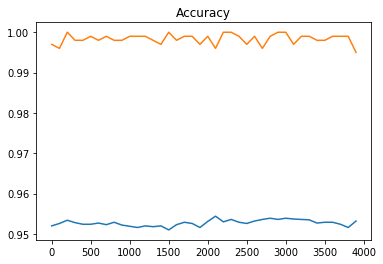

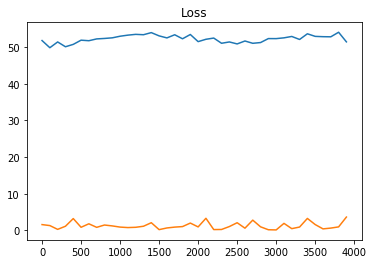

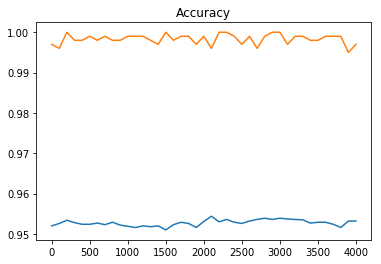

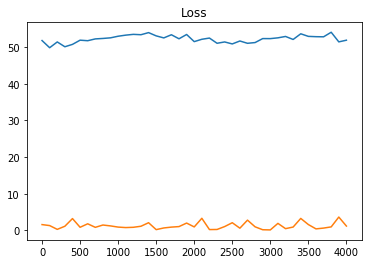

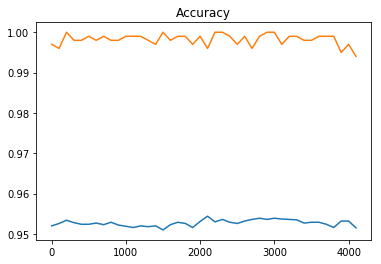

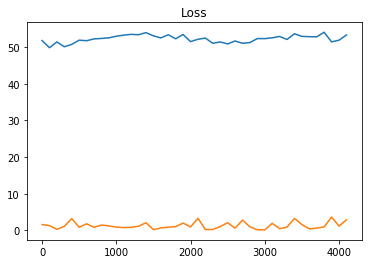

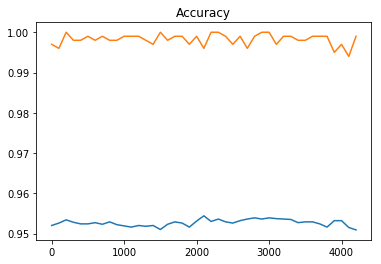

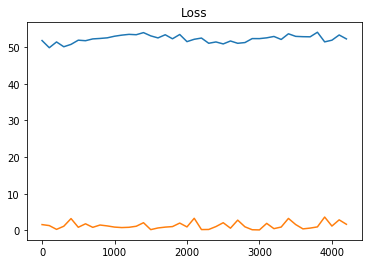

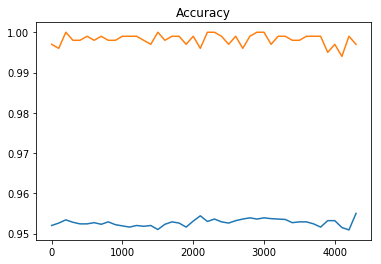

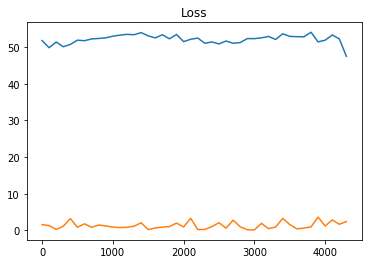

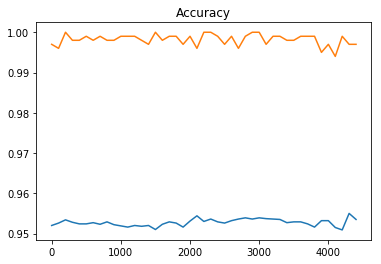

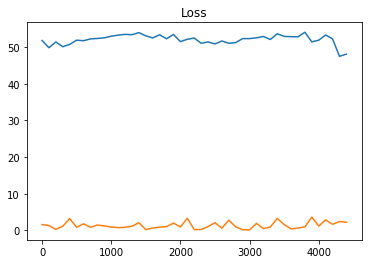

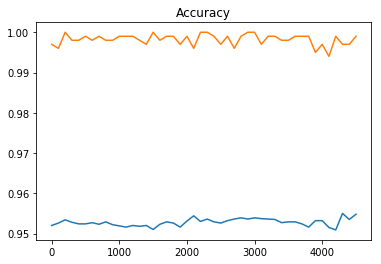

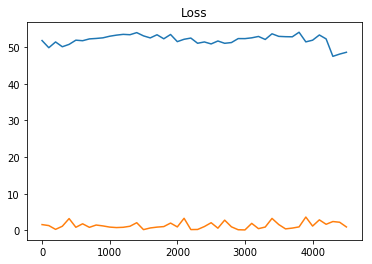

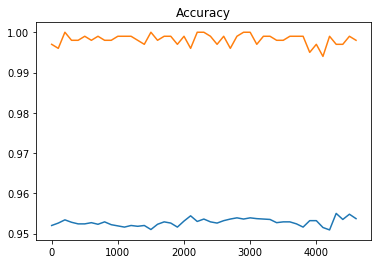

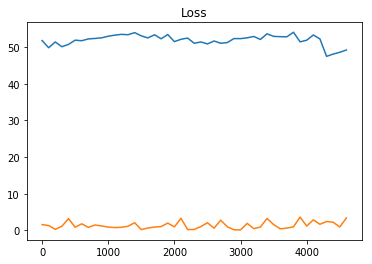

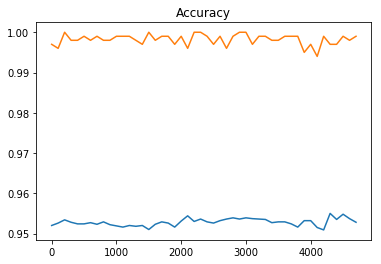

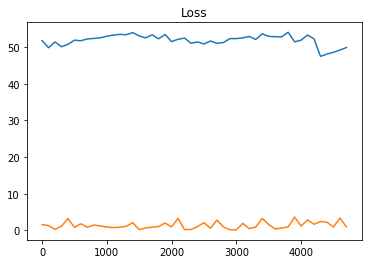

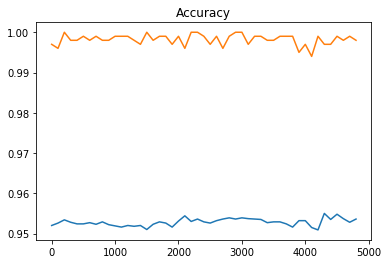

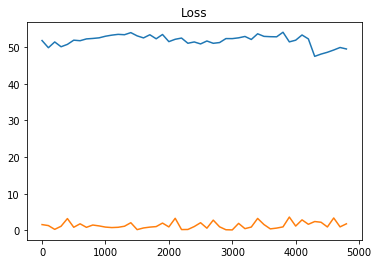

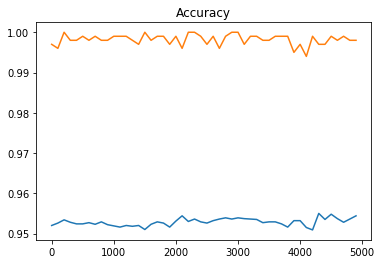

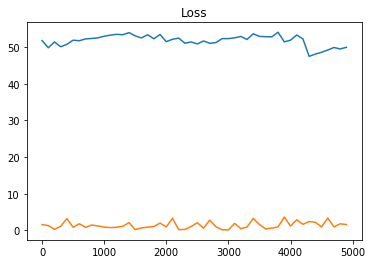

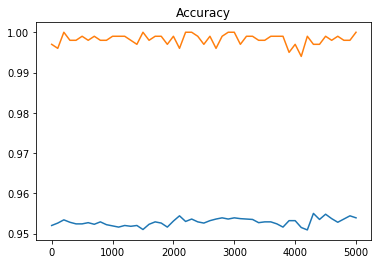

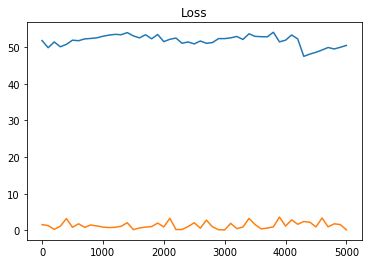

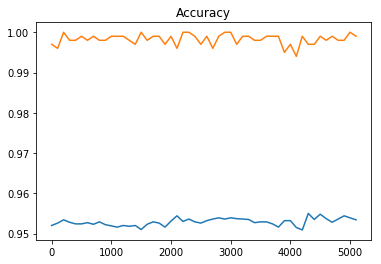

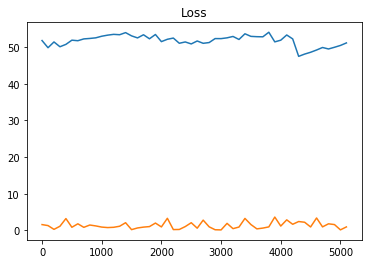

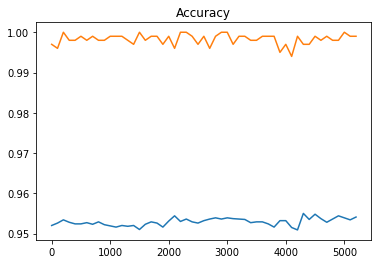

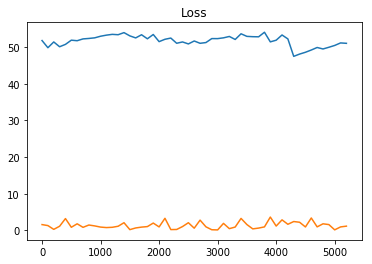

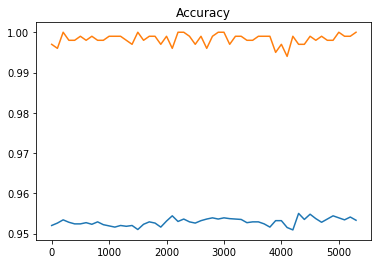

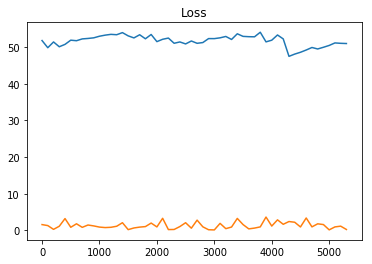

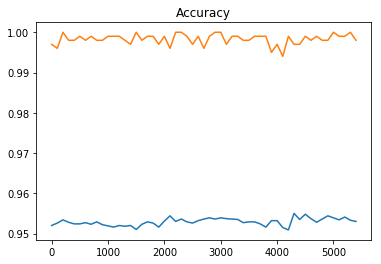

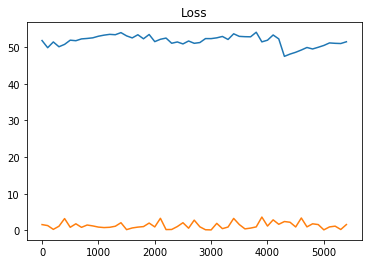

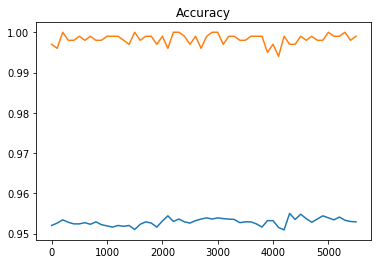

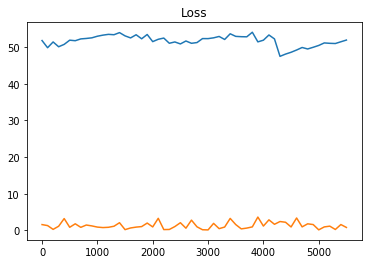

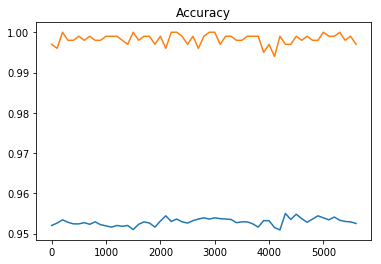

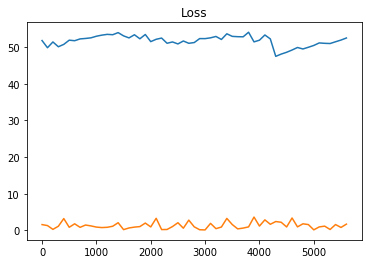

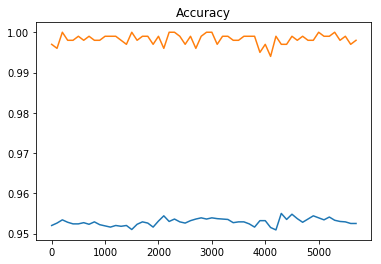

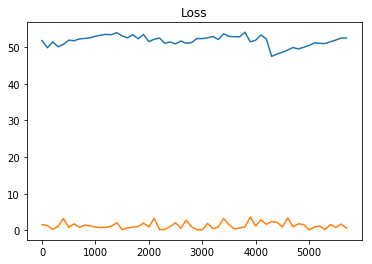

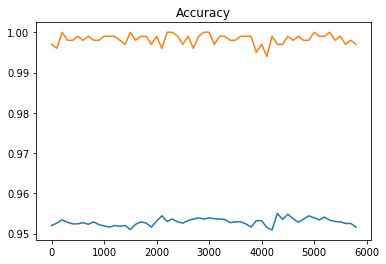

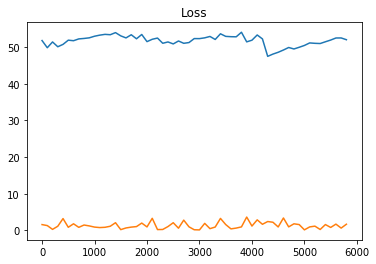

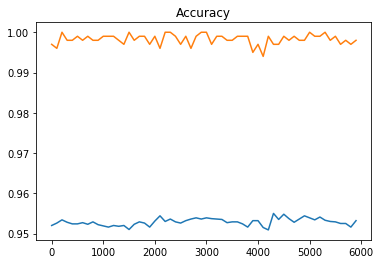

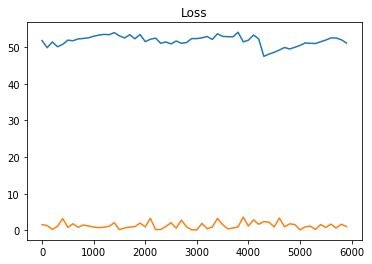

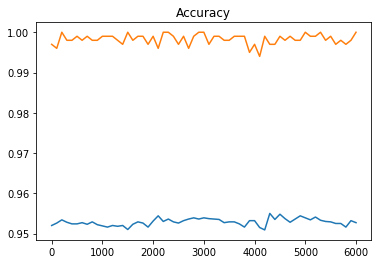

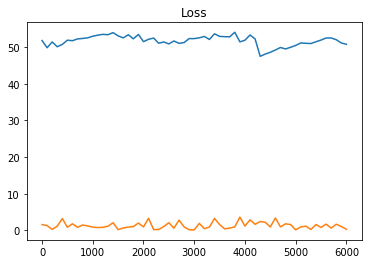

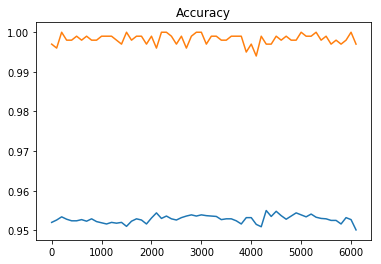

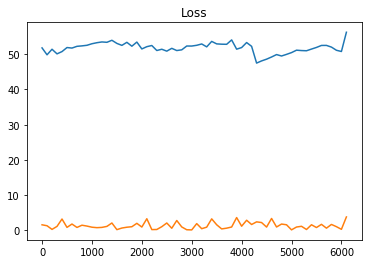

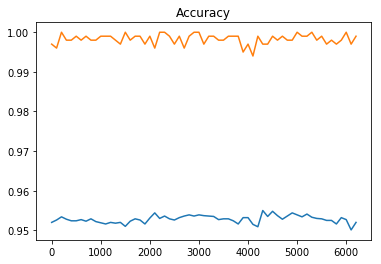

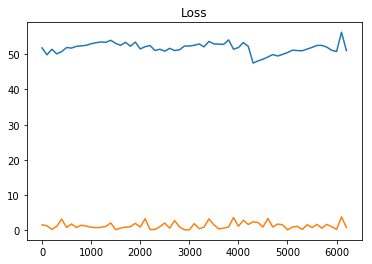

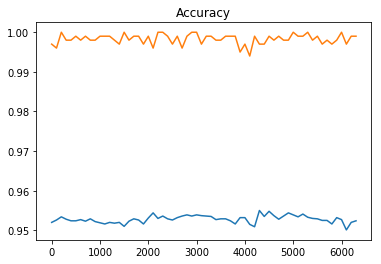

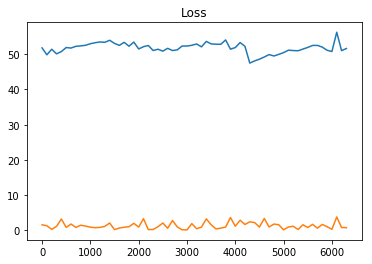

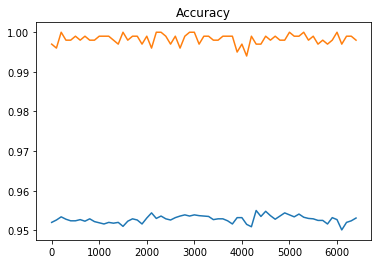

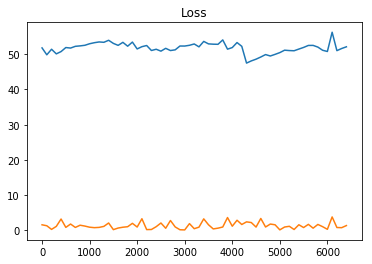

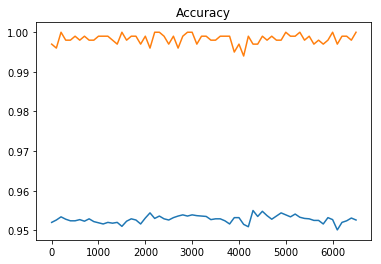

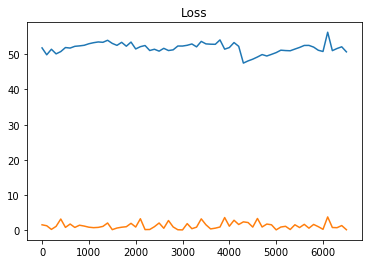

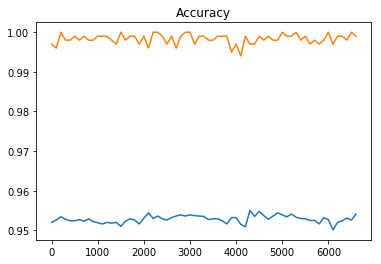

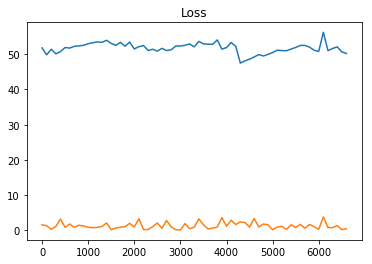

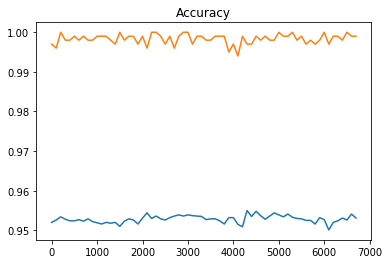

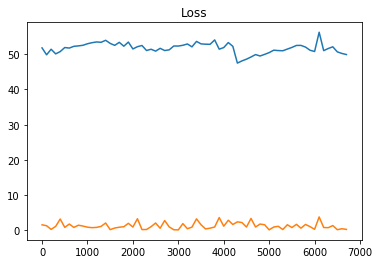

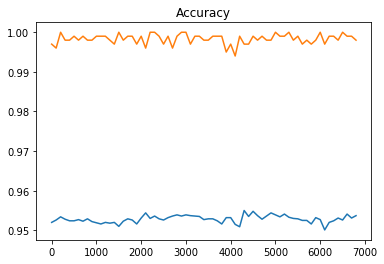

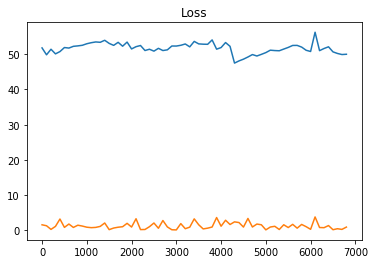

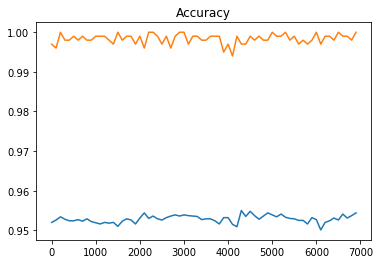

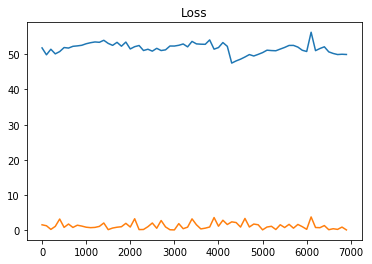

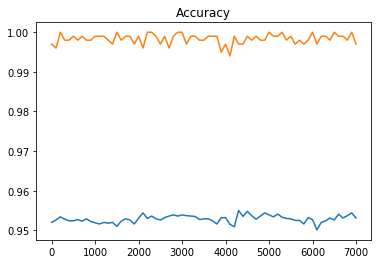

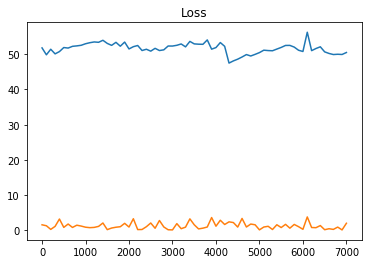

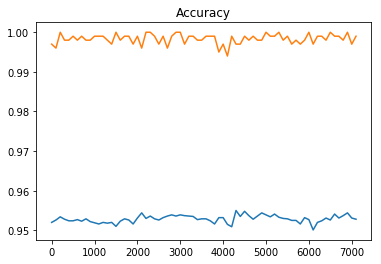

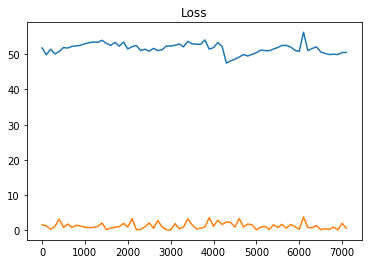

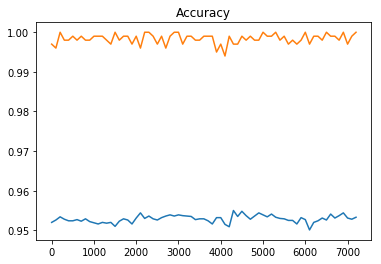

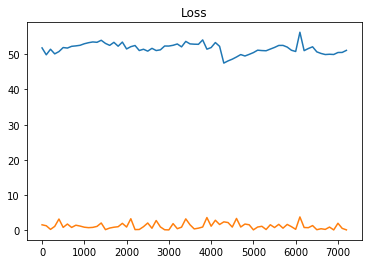

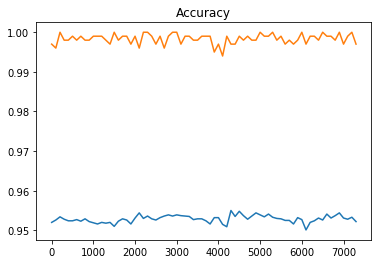

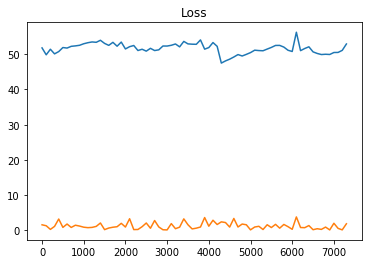

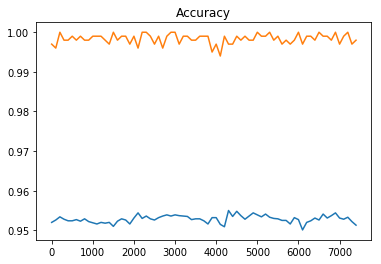

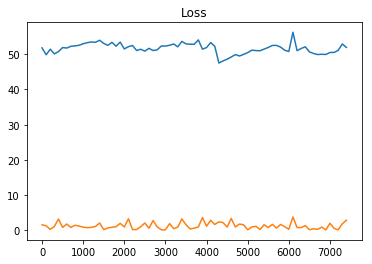

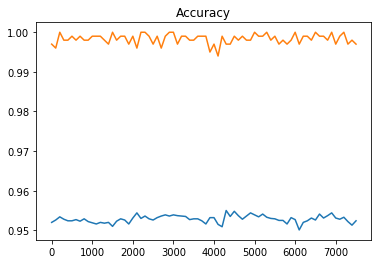

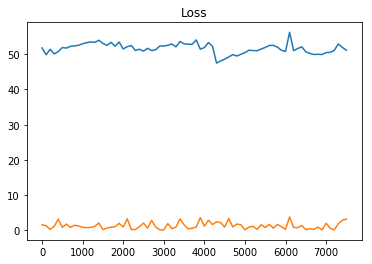

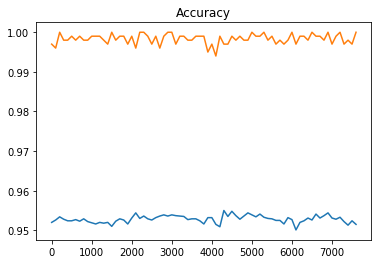

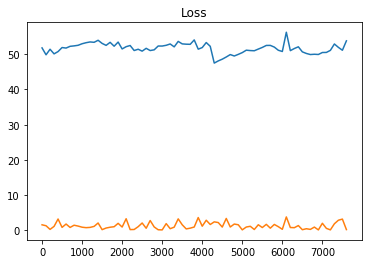

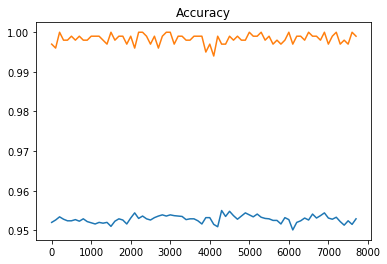

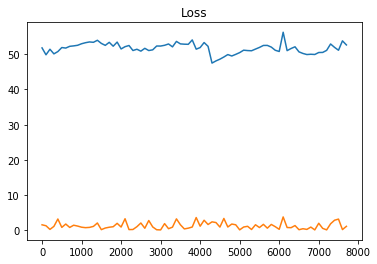

KeyboardInterrupt: 

In [33]:
import matplotlib.pyplot as plt
plt.ion()

fig=plt.figure()

index=[]
accuracy_train=[]
accuracy_test=[]
loss_train=[]
loss_test=[]

for i in range(1000000):
    batch_X,batch_Y=mnist.train.next_batch(1000)
    train_data={X:batch_X,Y_:batch_Y}
    sess.run(train_step,feed_dict=train_data)
    if i%10==0:
        a,c=sess.run([accuracy,cross_entropy],feed_dict=train_data)
        index.append(i)
        accuracy_train.append(a)
        loss_train.append(c)
    #print(str(i) + "Train: accuracy:" + str(a) + " loss: " + str(c))
    
    test_data={X:mnist.test.images,Y_:mnist.test.labels}
    a,c=sess.run([accuracy,cross_entropy],feed_dict=test_data)
    if i%10==0:
        #print(str(i) + " : accuracy:" + str(a) + " loss: " + str(c))
        accuracy_test.append(a)
        loss_test.append(c)
    
    if(i%10==0):
        
        #plt.xlabel(index)
        #plt.ylabel(accuracy_test)
        plt.plot(index,accuracy_test)
        plt.plot(index,accuracy_train)
        plt.title("Accuracy")
        plt.show()

        plt.clf()
        plt.plot(index,loss_test)
        plt.plot(index,loss_train)
        plt.title("Loss")
        plt.show()
    
    #print("b is:")
    #print (sess.run(b))
    #print("W is:")
    #print (sess.run(W))

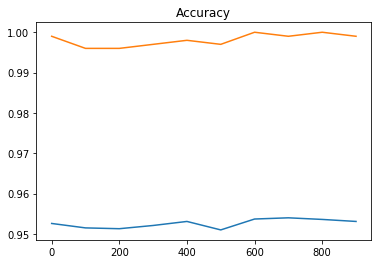

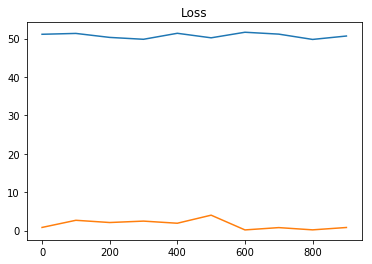

In [31]:
import matplotlib.pyplot as plt
#plt.xlabel(index)
#plt.ylabel(accuracy_test)
plt.plot(index,accuracy_test)
plt.plot(index,accuracy_train)
plt.title("Accuracy")
plt.show()

plt.clf()
plt.plot(index,loss_test)
plt.plot(index,loss_train)
plt.title("Loss")
plt.show()